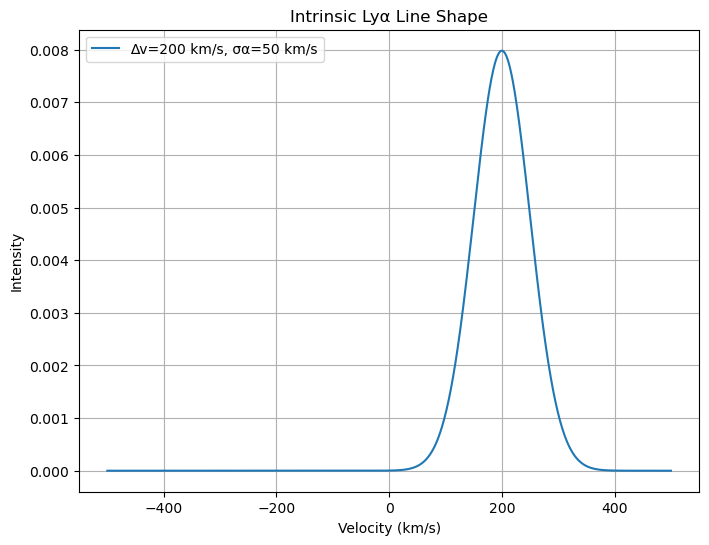

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def intrinsic_lya_lineshape(velocity, delta_v, sigma_alpha):
    """
    Model the Lyα line shape as a Gaussian.

    Parameters:
        velocity (numpy.ndarray): Array of velocity values (in km/s).
        delta_v (float): Velocity offset from the systemic redshift of the galaxy (in km/s).
        sigma_alpha (float): Velocity dispersion due to ISM scattering and thermal broadening (in km/s).

    Returns:
        numpy.ndarray: Intrinsic Lyα line shape values.
    """
    # Gaussian profile formula
    lineshape = (1 / (np.sqrt(2 * np.pi) * sigma_alpha)) * np.exp(-0.5 * ((velocity - delta_v) / sigma_alpha)**2)
    return lineshape

# Example usage
if __name__ == "__main__":
    # Define parameters
    delta_v = 200  # Velocity offset (km/s)
    sigma_alpha = 50  # Velocity dispersion (km/s)

    # Generate velocity array (km/s)
    velocity = np.linspace(-500, 500, 1000)

    # Compute the Lyα line shape
    lineshape = intrinsic_lya_lineshape(velocity, delta_v, sigma_alpha)

    # Plot the result
    plt.figure(figsize=(8, 6))
    plt.plot(velocity, lineshape, label=f"∆v={delta_v} km/s, σα={sigma_alpha} km/s")
    plt.title("Intrinsic Lyα Line Shape")
    plt.xlabel("Velocity (km/s)")
    plt.ylabel("Intensity")
    plt.legend()
    plt.grid()
    plt.show()
